In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("week2.csv")
df['REAL_DATE'] = df['YEAR']*100+df['MONTH_NUMBER']

C:\Users\luetianzhiyi\AppData\Local\Temp\ipykernel_10188\513543459.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("week2.csv")


<AxesSubplot:title={'center':'Proportions vs. Pet types'}>

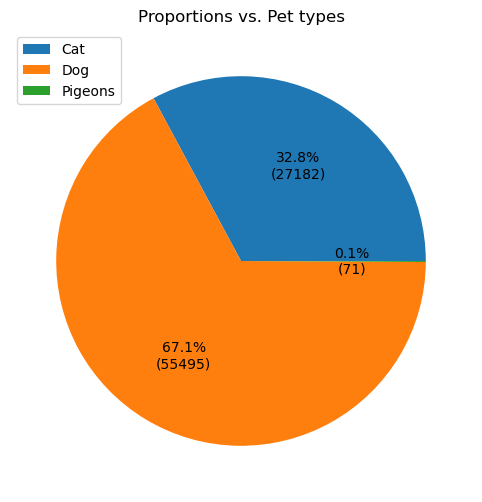

In [2]:
def func(pct, data):
    absolute = int(pct/100.*np.sum(data))
    return "{:.1f}%\n({:d})".format(pct, absolute)
def diff(cur, temp):
    if(cur != NaN and temp != NaN):
        return temp-cur
    else:
        return NaN

df_temp = df.groupby('PET_TYPE').agg(count=('MONTH', 'count'))
df_temp.plot(kind='pie', y='count', autopct=lambda pct: func(pct, df_temp['count']), 
             title='Proportions vs. Pet types', ylabel='', labeldistance=None, figsize=(9, 6))

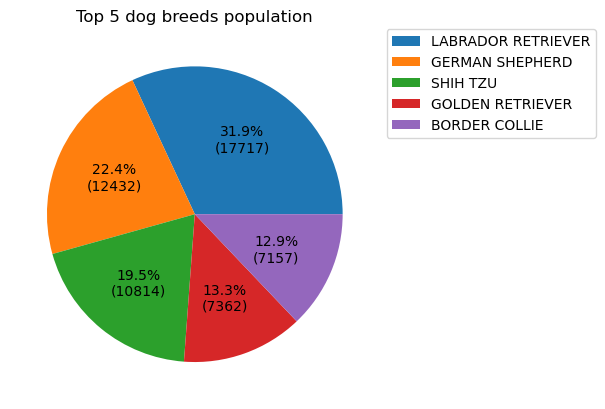

In [3]:
row = df['PET_TYPE'] == 'Dog'
df_IM = df[row]
df_IM = df_IM.groupby('BREED').agg(count=('MONTH', 'count')).sort_values("count", ascending=False)
df_IM.head(5).plot(kind='pie', y='count', autopct=lambda pct: func(pct, df_IM['count']), 
                     title='Top 5 dog breeds population', ylabel='', 
                   labeldistance=None).legend(bbox_to_anchor=(1, 1.02), loc='upper left')

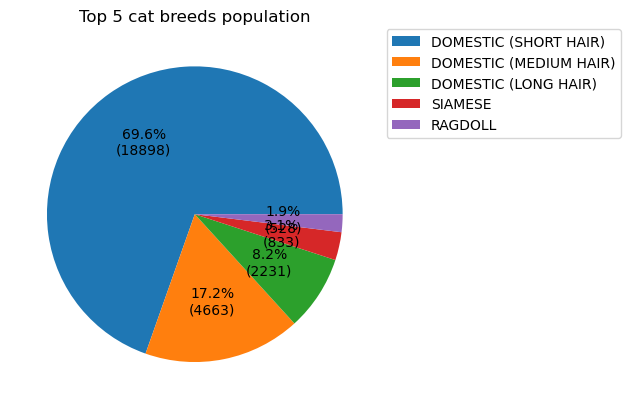

In [4]:
row = df['PET_TYPE'] == 'Cat'
df_IM = df[row]
df_IM = df_IM.groupby('BREED').agg(count=('MONTH', 'count')).sort_values("count", ascending=False)
df_IM.head(5).plot(kind='pie', y='count', autopct=lambda pct: func(pct, df_IM['count']), title='Top 5 cat breeds population', ylabel='', 
           labeldistance=None).legend(bbox_to_anchor=(1, 1.02), loc='upper left')

<AxesSubplot:title={'center':'Pigeons breeds population'}>

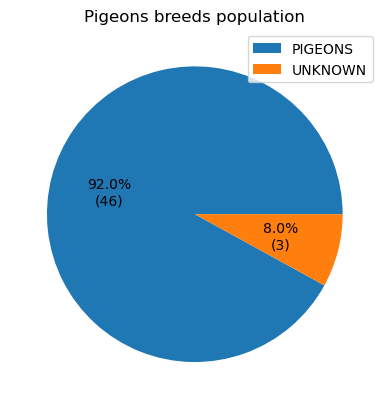

In [5]:
row = df['PET_TYPE'] == 'Pigeons'
df_IM = df[row]
df_IM = df_IM.groupby('BREED').agg(count=('MONTH', 'count')).sort_values("count", ascending=False)
df_IM.plot(kind='pie', y='count', autopct=lambda pct: func(pct, df_IM['count']), 
           title='Pigeons breeds population', ylabel='', labeldistance=None)

<AxesSubplot:title={'center':'Dog gender population'}>

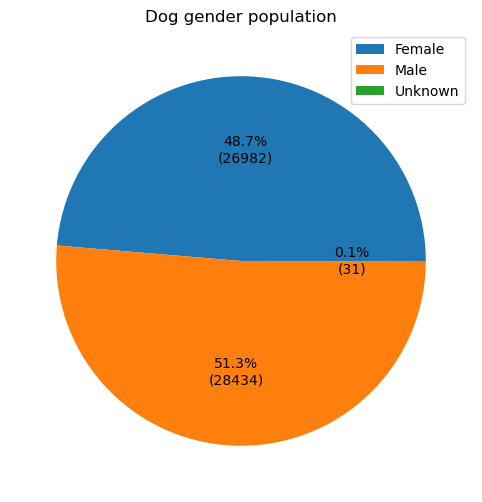

In [6]:
row = df['PET_TYPE'] == 'Dog'
df_IM = df[row]
df_IM = df_IM.groupby('GENDER').agg(count=('MONTH', 'count'))
df_IM.plot(kind='pie', y='count', autopct=lambda pct: func(pct, df_IM['count']), 
           title='Dog gender population', ylabel='', labeldistance=None, figsize=(9, 6))

<AxesSubplot:title={'center':'Cat gender population'}>

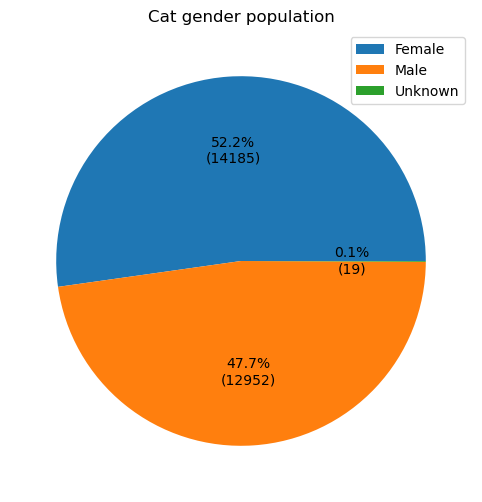

In [7]:
row = df['PET_TYPE'] == 'Cat'
df_IM = df[row]
df_IM = df_IM.groupby('GENDER').agg(count=('MONTH', 'count'))
df_IM.plot(kind='pie', y='count', autopct=lambda pct: func(pct, df_IM['count']), 
           title='Cat gender population', ylabel='', labeldistance=None, figsize=(9, 6))

<AxesSubplot:title={'center':'Pigeons gender population'}>

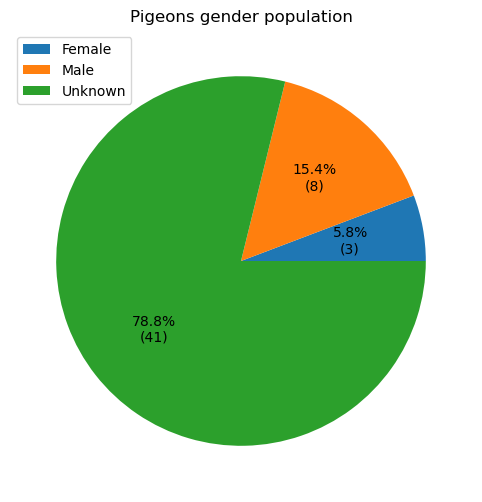

In [8]:
row = df['PET_TYPE'] == 'Pigeons'
df_IM = df[row]
df_IM = df_IM.groupby('GENDER').agg(count=('MONTH', 'count'))
df_IM.plot(kind='pie', y='count', autopct=lambda pct: func(pct, df_IM['count']), 
           title='Pigeons gender population', ylabel='', labeldistance=None, figsize=(9, 6))

In [9]:
df_temp = df.groupby(['REAL_DATE', 'PET_TYPE']).size().unstack()

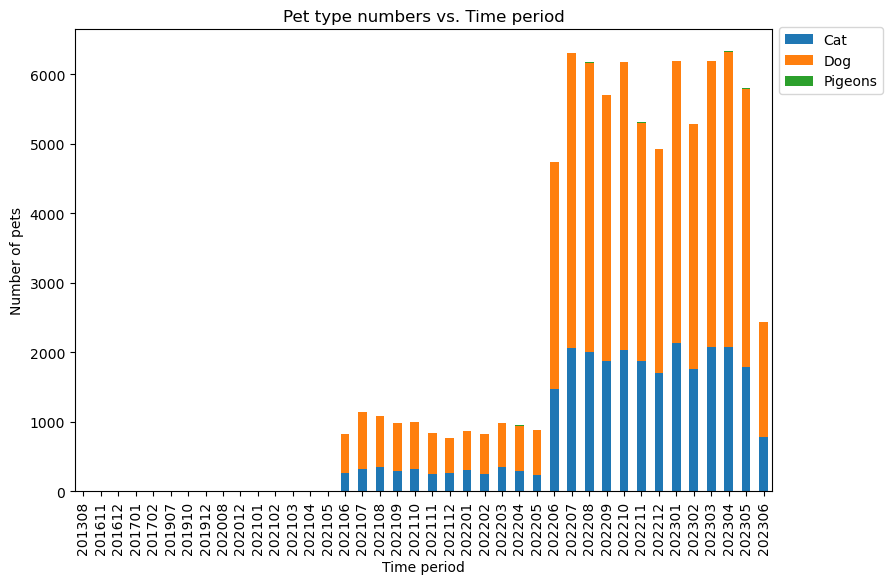

In [10]:
df_temp.plot(kind='bar', stacked=True, figsize=(9, 6), xlabel='Time period', ylabel='Number of pets', 
             title='Pet type numbers vs. Time period').legend(bbox_to_anchor=(1, 1.02), loc='upper left')

<AxesSubplot:title={'center':'Monthly change in number of cats'}, xlabel='Time period', ylabel='Number of cats'>

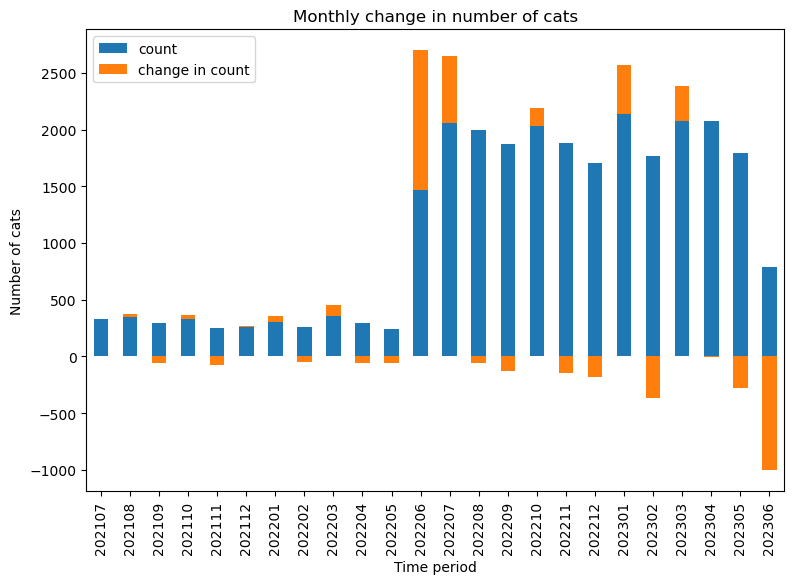

In [11]:
df_temp = df[df['PET_TYPE'] == 'Cat']
df_temp = df_temp.groupby('REAL_DATE').agg(count=('MONTH', 'count'))
df_temp = df_temp[5:]
df_diff = df_temp.diff()
df_diff = df_diff.rename(columns={'count': 'change in count'})
df_temp = pd.concat([df_temp, df_diff], axis=1)
df_temp.plot(kind='bar', stacked=True, figsize=(9, 6), xlabel='Time period', ylabel='Number of cats', 
             title='Monthly change in number of cats')

<AxesSubplot:title={'center':'Monthly change in number of dogs'}, xlabel='Time period', ylabel='Number of dogs'>

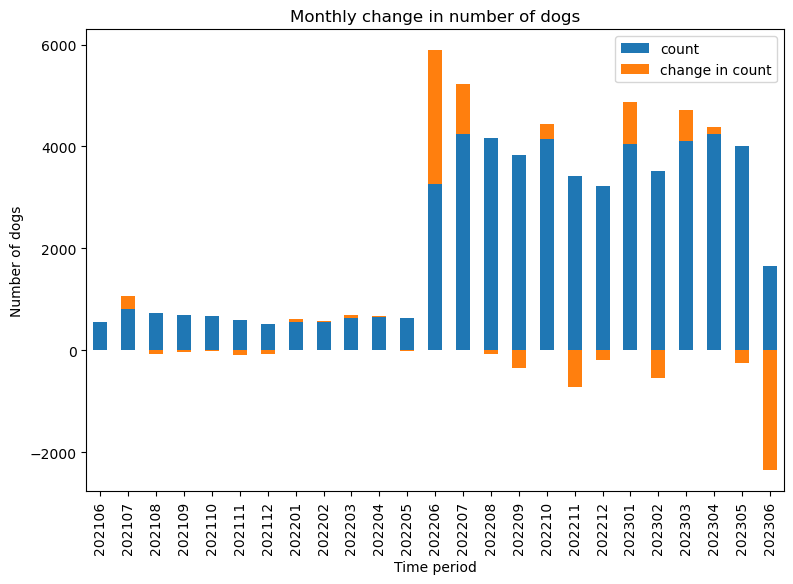

In [12]:
df_temp = df[df['PET_TYPE'] == 'Dog']
df_temp = df_temp.groupby('REAL_DATE').agg(count=('MONTH', 'count'))
df_temp = df_temp[12:]
df_diff = df_temp.diff()
df_diff = df_diff.rename(columns={'count': 'change in count'})
df_temp = pd.concat([df_temp, df_diff], axis=1)
df_temp.plot(kind='bar', stacked=True, figsize=(9, 6), xlabel='Time period', ylabel='Number of dogs', 
             title='Monthly change in number of dogs')

<AxesSubplot:title={'center':'Monthly change in number of pigeons'}, xlabel='Time period', ylabel='Number of pigeons'>

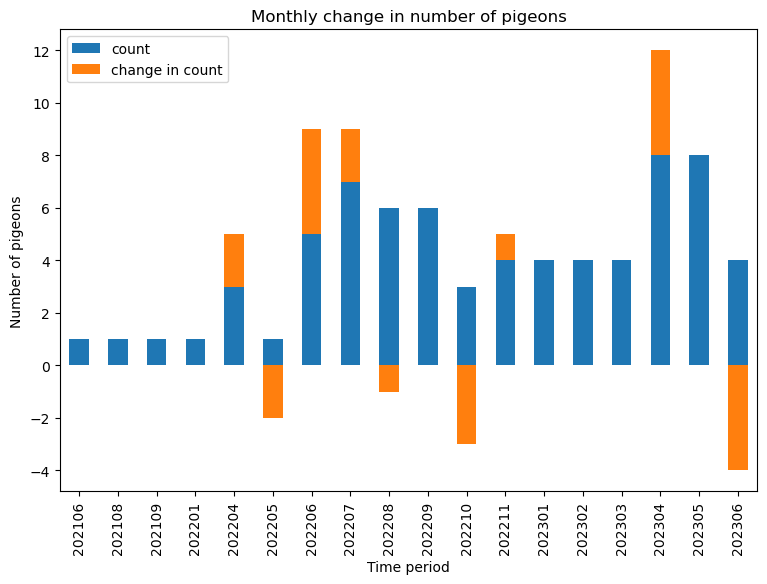

In [13]:
df_temp = df[df['PET_TYPE'] == 'Pigeons']
df_temp = df_temp.groupby('REAL_DATE').agg(count=('MONTH', 'count'))
df_diff = df_temp.diff()
df_diff = df_diff.rename(columns={'count': 'change in count'})
df_temp = pd.concat([df_temp, df_diff], axis=1)
df_temp.plot(kind='bar', stacked=True, figsize=(9, 6), xlabel='Time period', ylabel='Number of pigeons', 
             title='Monthly change in number of pigeons')